In [1]:
from tensorflow import keras
from keras.layers import Dense, Flatten, AveragePooling2D, Conv2D
from keras.datasets import mnist
from keras import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

2025-02-28 16:29:07.889818: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-28 16:29:07.900512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740740347.913431  946962 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740740347.916985  946962 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 16:29:07.931030: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
# Reshape data to add the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# LeNet Architecture

In [4]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(16,kernel_size=(5,5), activation='tanh',padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256, activation='tanh'))
model.add(Dense(84, activation='tanh'))

model.add(Dense(10, activation='softmax'))

/home/harry/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1740740352.117201  946962 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3620 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 6GB Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        21,588 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,802 (354.70 KB)

 Trainable params: 90,802 (354.70 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:


model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


I0000 00:00:1740740354.109369  947043 service.cc:148] XLA service 0x7f955c016880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740740354.109493  947043 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-02-28 16:29:14.130057: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740740354.253053  947043 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-28 16:29:16.445626: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_435', 96 bytes spill stores, 96 bytes spill loads

2025-02-28 16:29:17.529518: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4

 49/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5758 - loss: 1.4276

I0000 00:00:1740740359.543425  947043 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8158 - loss: 0.6375

2025-02-28 16:29:22.836600: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76_0', 68 bytes spill stores, 68 bytes spill loads



375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8177 - loss: 0.6309 - val_accuracy: 0.9503 - val_loss: 0.1722
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9527 - loss: 0.1593 - val_accuracy: 0.9660 - val_loss: 0.1149
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9691 - loss: 0.1028 - val_accuracy: 0.9744 - val_loss: 0.0881
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9771 - loss: 0.0728 - val_accuracy: 0.9746 - val_loss: 0.0824
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.0571 - val_accuracy: 0.9783 - val_loss: 0.0688
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9810 - val_loss: 0.0625
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0354 - val_accuracy: 0.9801 - val_loss: 0.0648
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0293 - val_accuracy: 0.98

In [8]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9805 - loss: 0.0576


[0.047927726060152054, 0.984499990940094]

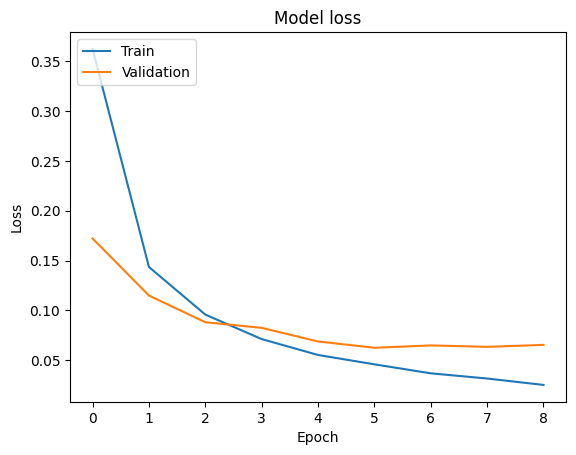

In [9]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()